# Lab 4
### Zespół
- Krzysztof Kordal
- Szymon Szewczyk
- Łukasz Szyszka

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowe F
def F(u):
    x, y = u
    F1 = x**2 + y**2
    F2 = (x - 1)**2 + y**2
    return np.array([F1, F2])

### Skalaryzacja przez funkcję liniową

In [4]:
def scalarization_linear(v, lambdas):
    """
    Skalaryzacja przez funkcję liniową: S1(v, λ) = sum(λ_i * v_i) dla λ > 0
    :param v: Wektor kryteriów (np. [v1, v2, ..., vN])
    :param lambdas: Wektor wag λ (np. [λ1, λ2, ..., λN]), gdzie λ > 0
    :return: Wynik skalaryzacji
    """
    return np.dot(lambdas, v)

### metoda eps-ograniczeń,

In [5]:
def epsilon_constraints(u, a, j, F):
    """
    Metoda ε-ograniczeń: S2(u, a, j) = Fj(u) z ograniczeniami Fi(u) ≤ ai, dla i ≠ j
    :param u: Wektor zmiennych decyzyjnych
    :param a: Wektor ograniczeń ε dla funkcji kryterialnych Fi(u)
    :param j: Indeks funkcji Fj, którą optymalizujemy
    :param F: Lista funkcji celu F = [F1, F2, ..., FN]
    :return: Wynik funkcji Fj(u), jeśli spełnia ograniczenia
    """
    for i, func in enumerate(F):
        if i != j and func(u) > a[i]:
            return float('inf')  # Odrzucenie punktu, jeśli narusza ograniczenia
    return F[j](u)  # Zwróć wartość optymalizowanego kryterium Fj(u)

### skalaryzacja przez odległość od wybranego punktu dominującego x

In [ ]:
def scalarization_distance(u, x, lambd, p, F):
    """
    Skalaryzacja przez odległość: S3(u, x, λ, p) = ||F(u) - x||λ,p
    :param u: Wektor zmiennych decyzyjnych
    :param x: Punkt dominujący
    :param lambd: Parametr skalaryzacji λ > 0
    :param p: Parametr odległości (p ≥ 1 lub p = ∞ dla metryki Czebyszewa)
    :param F: Funkcja wektorowa celu
    :return: Odległość ||F(u) - x||λ,p
    """
    diff = np.abs(F(u) - x) ** lambd  # Wektor różnic |F(u) - x| podniesiony do potęgi λ
    if p == np.inf:
        return np.max(diff)  # Metryka Czebyszewa
    else:
        return np.sum(diff ** (1 / p))  # Odległość w metryce p

### Dalsza część

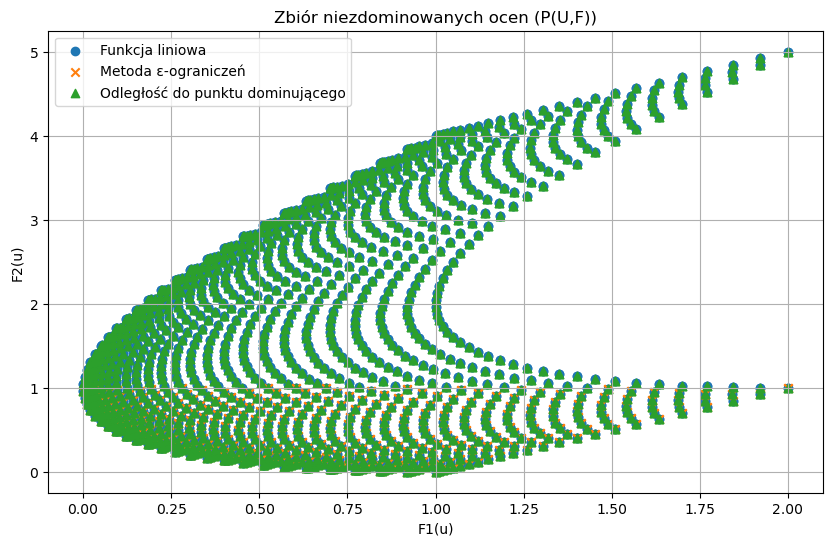

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Definiujemy zbiór U jako punkty w kwadracie [-1, 1] x [-1, 1]
def generate_decision_space(bounds=(-1, 1), steps=50):
    x_values = np.linspace(bounds[0], bounds[1], steps)
    y_values = np.linspace(bounds[0], bounds[1], steps)
    U = [(x, y) for x in x_values for y in y_values]
    return U

# Generowanie zbiorów punktów P(U, F) i FP(U)
def calculate_nondominated_sets(U, method, **kwargs):
    P_U_F = []  # Zbiór niezdominowanych ocen
    FP_U = []   # Zbiór niezdominowanych punktów decyzyjnych

    for u in U:
        value = method(u, **kwargs)
        if value < float('inf'):  # Sprawdzamy, czy punkt nie jest odrzucony
            P_U_F.append(F(u))
            FP_U.append(u)
    
    return np.array(P_U_F), np.array(FP_U)

# Parametry skalaryzacji
lambdas = np.array([0.5, 0.5])
a = [1, 1]
j = 0
x_dom = np.array([0.5, 0.5])
lambd = 1
p = 2

# Generowanie przestrzeni decyzyjnej
U = generate_decision_space()

# Obliczanie dla trzech metod skalaryzacji
P_U_F_linear, FP_U_linear = calculate_nondominated_sets(U, scalarization_linear, lambdas=lambdas)
P_U_F_epsilon, FP_U_epsilon = calculate_nondominated_sets(U, epsilon_constraints, a=a, j=j, F=[lambda u: F(u)[0], lambda u: F(u)[1]])
P_U_F_distance, FP_U_distance = calculate_nondominated_sets(U, scalarization_distance, x=x_dom, lambd=lambd, p=p, F=F)

# Wizualizacja
plt.figure(figsize=(10, 6))

# Zbiór niezdominowanych ocen (P(U,F))
plt.scatter(P_U_F_linear[:, 0], P_U_F_linear[:, 1], label="Funkcja liniowa", marker='o')
plt.scatter(P_U_F_epsilon[:, 0], P_U_F_epsilon[:, 1], label="Metoda ε-ograniczeń", marker='x')
plt.scatter(P_U_F_distance[:, 0], P_U_F_distance[:, 1], label="Odległość do punktu dominującego", marker='^')

plt.title("Zbiór niezdominowanych ocen (P(U,F))")
plt.xlabel("F1(u)")
plt.ylabel("F2(u)")
plt.legend()
plt.grid()
plt.show()
